# Setting
## packages

In [2]:
# !pip install ir-datasets

## libraries
- To tokenize a sentence and lemmatize words, use *get_normalized_toks()*.
- To get relevaent documents, use *get_answer_set()*.


In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

import ir_datasets

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Return normalized words after tokenizing a sentence and lemmatizing words
def get_normalized_toks(my_sentence):
  toks = word_tokenize(my_sentence)
  lemmatizer = WordNetLemmatizer()

  # Refer to https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
  tags = nltk.pos_tag(toks)
  result = []
  ## from https://velog.io/@pheol9166/%ED%91%9C%EC%A0%9C%EC%96%B4-%EC%B6%94%EC%B6%9CLemmatization
  for token, tag in tags:
    if tag.startswith('N'):
      lemma = lemmatizer.lemmatize(token, pos='n')
    elif tag.startswith('V'):
      lemma = lemmatizer.lemmatize(token, pos='v')
    elif tag.startswith('J'):
      lemma = lemmatizer.lemmatize(token, pos='a')
    elif tag.startswith('R'):
      lemma = lemmatizer.lemmatize(token, pos='r')
    else:
      lemma = lemmatizer.lemmatize(token)

    result.append(lemma)
  return result


# dataset type: ir_datasets.datasets.base.Dataset
# qid: query id (string type)
def get_answer_set(dataset, qid):
  res = []
  for qrel in dataset.qrels_iter():
    if qid == qrel.query_id:
      if qrel.relevance != -1:
        #print(qrel.query_id, qrel.doc_id, qrel.relevance, qrel.iteration)
        res.append('d'+qrel.doc_id)
  return np.array(res)


print()

#  Example
s = 'experimental investigation of the aerodynamics of a\nwing in a slipstream .\n  an experimental study of a wing in a propeller slipstream was\nmade in order to determine the spanwise distribution of the lift\nincrease due to slipstream at different angles of attack of the wing\nand at different free stream to slipstream velocity ratios.'
toks = get_normalized_toks(s)
print('# example of get_normalized_toks:', toks)

#  Example
dataset = ir_datasets.load("cranfield")
print('the relevant documents of query 1:', get_answer_set(dataset, '1'))


# example of get_normalized_toks: ['experimental', 'investigation', 'of', 'the', 'aerodynamics', 'of', 'a', 'wing', 'in', 'a', 'slipstream', '.', 'an', 'experimental', 'study', 'of', 'a', 'wing', 'in', 'a', 'propeller', 'slipstream', 'be', 'make', 'in', 'order', 'to', 'determine', 'the', 'spanwise', 'distribution', 'of', 'the', 'lift', 'increase', 'due', 'to', 'slipstream', 'at', 'different', 'angle', 'of', 'attack', 'of', 'the', 'wing', 'and', 'at', 'different', 'free', 'stream', 'to', 'slipstream', 'velocity', 'ratio', '.']
the relevant documents of query 1: ['d184' 'd29' 'd31' 'd12' 'd51' 'd102' 'd13' 'd14' 'd15' 'd57' 'd378'
 'd859' 'd185' 'd30' 'd37' 'd52' 'd142' 'd195' 'd875' 'd56' 'd66' 'd95'
 'd462' 'd497' 'd858' 'd876' 'd879' 'd880']


[nltk_data] Downloading package punkt to /Users/dogiheon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dogiheon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dogiheon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Loading Cranfield Data Set

 - ref: https://ir-datasets.com/cranfield.html

In [24]:
import ir_datasets
dataset = ir_datasets.load("cranfield")
# print sample documents (first two documents)
print("################ Cranfield Samples #############")
for doc in dataset.docs_iter()[:2]:
    print('###################################')
    print('- doc:', doc) # namedtuple<doc_id, title, text, author, bib>
    print('\n')
    print('- doc.text:', doc.text)
    print('\n')

################ Cranfield Samples #############
###################################
- doc: CranfieldDoc(doc_id='1', title='experimental investigation of the aerodynamics of a\nwing in a slipstream .', text='experimental investigation of the aerodynamics of a\nwing in a slipstream .\n  an experimental study of a wing in a propeller slipstream was\nmade in order to determine the spanwise distribution of the lift\nincrease due to slipstream at different angles of attack of the wing\nand at different free stream to slipstream velocity ratios .  the\nresults were intended in part as an evaluation basis for different\ntheoretical treatments of this problem .\n  the comparative span loading curves, together with\nsupporting evidence, showed that a substantial part of the lift increment\nproduced by the slipstream was due to a /destalling/ or\nboundary-layer-control effect .  the integrated remaining lift\nincrement, after subtracting this destalling lift, was found to agree\nwell with a pote

# Making a simple dictionary
- Make a simple dictionary structure with 1400 Cranfield Documents (Use CranfieldDoc.text. You do not include CranfieldDoc.title)
  - variable name: my_dic
  - Ignore two documents with the empy text.
- Get normalized tokens using "get_normalized_toks()" and use them as terms in the dictionary.
  - Punctuation marks such as "." may be included in terms. It is ok.
- Dictionary structure using python dict().
  - dictionary form: {word1:count1, word2:count2, word3:count3, ...}
  - key: word, value: word count


In [3]:
for doc in dataset.docs_iter()[:2]:
    toks = get_normalized_toks(doc.text)
    print(toks)
    print("==================")

['experimental', 'investigation', 'of', 'the', 'aerodynamics', 'of', 'a', 'wing', 'in', 'a', 'slipstream', '.', 'an', 'experimental', 'study', 'of', 'a', 'wing', 'in', 'a', 'propeller', 'slipstream', 'be', 'make', 'in', 'order', 'to', 'determine', 'the', 'spanwise', 'distribution', 'of', 'the', 'lift', 'increase', 'due', 'to', 'slipstream', 'at', 'different', 'angle', 'of', 'attack', 'of', 'the', 'wing', 'and', 'at', 'different', 'free', 'stream', 'to', 'slipstream', 'velocity', 'ratio', '.', 'the', 'result', 'be', 'intend', 'in', 'part', 'a', 'an', 'evaluation', 'basis', 'for', 'different', 'theoretical', 'treatment', 'of', 'this', 'problem', '.', 'the', 'comparative', 'span', 'load', 'curve', ',', 'together', 'with', 'support', 'evidence', ',', 'show', 'that', 'a', 'substantial', 'part', 'of', 'the', 'lift', 'increment', 'produce', 'by', 'the', 'slipstream', 'be', 'due', 'to', 'a', '/destalling/', 'or', 'boundary-layer-control', 'effect', '.', 'the', 'integrated', 'remain', 'lift', '

In [4]:
my_dic = {}
NUM_DOC = 1400-2
NUM_QUERY = 225
####### YOUR CODE ########
for doc in dataset.docs_iter()[:NUM_DOC]:
    toks = get_normalized_toks(doc.text)
    for term in toks:
        if my_dic.get(term)==None:
            my_dic[term]=0
        my_dic[term]+=1

###########################

# for doc in dataset.docs_iter():
#     if doc.text=='':
#       print("error:", doc.doc_id)
#       continue

    ####### YOUR CODE ########


    ###########################

In [5]:
my_dic

{'experimental': 421,
 'investigation': 340,
 'of': 12594,
 'the': 19410,
 'aerodynamics': 25,
 'a': 6830,
 'wing': 705,
 'in': 4606,
 'slipstream': 41,
 '.': 9930,
 'an': 1386,
 'study': 318,
 'propeller': 72,
 'be': 9763,
 'make': 499,
 'order': 170,
 'to': 4522,
 'determine': 326,
 'spanwise': 42,
 'distribution': 596,
 'lift': 303,
 'increase': 370,
 'due': 170,
 'at': 1829,
 'different': 125,
 'angle': 425,
 'attack': 207,
 'and': 6124,
 'free': 170,
 'stream': 240,
 'velocity': 553,
 'ratio': 583,
 'result': 1055,
 'intend': 12,
 'part': 153,
 'evaluation': 33,
 'basis': 76,
 'for': 3478,
 'theoretical': 280,
 'treatment': 44,
 'this': 1078,
 'problem': 591,
 'comparative': 7,
 'span': 42,
 'load': 277,
 'curve': 152,
 ',': 7054,
 'together': 42,
 'with': 2256,
 'support': 87,
 'evidence': 30,
 'show': 587,
 'that': 1567,
 'substantial': 18,
 'increment': 8,
 'produce': 91,
 'by': 1740,
 '/destalling/': 1,
 'or': 481,
 'boundary-layer-control': 1,
 'effect': 915,
 'integrated': 5

# Zipf's law
- Sort <word, count> pairs in decreasing order from ***my_dic***.
- Draw the pairs (i, word_count_i) using ***pyplot.plot()***.
  - (1, 19421), (2, 12609), ..., (8406, 1)

In [6]:
my_dic_desc = sorted(my_dic.items(), reverse=True, key=lambda item: item[1])

In [7]:
my_dic_desc_2=sorted(my_dic.values())[::-1]
len(my_dic_desc_2)

8403

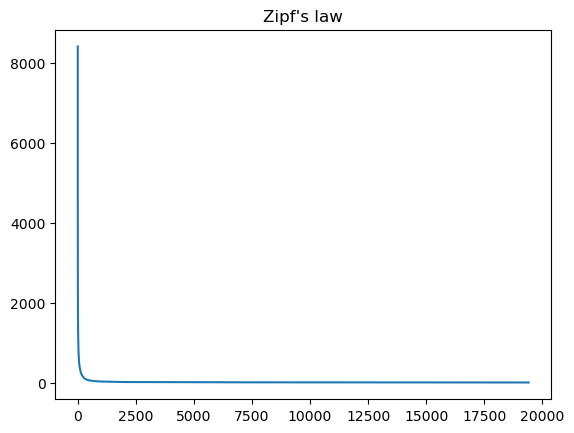

In [8]:
####### YOUR CODE ########
import matplotlib.pyplot as plt

x = my_dic_desc_2
y = [i for i in range(1,len(my_dic_desc_2)+1)]

plt.plot(x, y)

plt.title("Zipf's law")

plt.show()



# plt.plot ...
#############################

########### [Capture1] Capture your pyplot.plot image ##############

- Draw the pairs (log10(i), log10(word_count_i)) using pyplot.plot().
  - (log10(1), log10(19421)), (log10(2), log10(12609)), ..., (log10(8406), log10(1))
- Draw the equation log10(cfi) = log10(c) + k log10(i) where log10(c) = 4.3, k=-1.
  - (log10(1), 4.3-log10(1)), (log10(2), 4.3-log10(2)), ..., (log10(8406), 4.3-log10(8406))

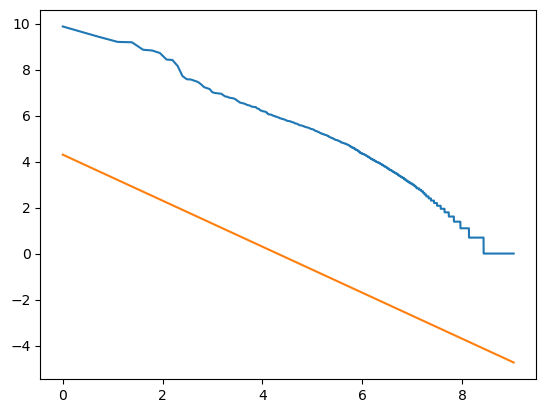

In [9]:
####### YOUR CODE ########
import math

x = [i for i in range(1,len(my_dic_desc_2)+1)]
y = my_dic_desc_2
log_x = list(map(lambda x: math.log(x), x))
log_y = list(map(lambda y: math.log(y), y))

plt.plot(log_x, log_y)

# 주어진 값
log_c = 4.3
k = -1

x = [i for i in range(1,len(my_dic_desc_2)+1)]
y = [i for i in range(1,len(my_dic_desc_2)+1)]
log_x_2 = list(map(lambda x: math.log(x), x))
log_y_2 = list(map(lambda y: log_c+k*math.log(y), y))
plt.plot(log_x_2, log_y_2)

plt.show()

# plt.plot ...
#############################

########### [Capture2] Capture your pyplot.plot image ##############

# Making a count matrix
- Count Matrix Format
  - count_matrix = 8406 x 1398 matrix (terms x documents)
  - count_matrix[i, j] = word count of the i-th term at the j-th document
    - Terms should be sorted alphabetically.
  - use pandas.DataFrame for easy handling or use numpy

In [10]:
NUM_DOC = 1400-2

terms=set()
for doc in dataset.docs_iter():
    if doc.text=='': continue
    toks = get_normalized_toks(doc.text)
    for tok in toks:
        terms.add(tok)
terms=sorted(terms)

In [11]:
type(terms)

list

In [12]:
data=dict()
doc_index=1
for doc in dataset.docs_iter():
    if doc.text=='': continue
    temp=dict()
    for term in terms:
        temp[term]=0.0
    toks = get_normalized_toks(doc.text)
    for tok in toks:
        temp[tok]+=1
    data[f"q{doc_index}"]=list(temp.values())
    doc_index+=1

In [13]:
##### YOUR CODE ########

count_matrix_dataframe = pd.DataFrame(data, index=terms)
print(count_matrix_dataframe)
#######################

# for doc in dataset.docs_iter():
#     if doc.text=='': continue

    ##### YOUR CODE ########



    ########################

                q1   q2   q3   q4   q5   q6   q7   q8   q9  q10  ...  q1389  \
$              0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
'              0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
''             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
'density       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
'displacement  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
...            ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
zhukhovitskii  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
zone           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
zoom           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
zuk            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
zurich         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   

               q1390  q1391  q1392  q1393  q1394  q

In [14]:
# [Capture3] Capture the result of the following statement if the type of count matrix is DataFrame
count_matrix_dataframe.loc[count_matrix_dataframe['q2']>0, 'q2']

's            1.0
,             5.0
.            10.0
a            10.0
again         1.0
             ... 
viscosity     2.0
viscous       2.0
vorticity     2.0
wave          2.0
while         1.0
Name: q2, Length: 95, dtype: float64

In [15]:
# [Capture3] Capture the result of the following statement if the type of count matrix is numpy.
#   Note that 1 is the index of document2. If you have a different index, please use
# count_matrix_numpy[count_matrix_numpy[:, 1]>0, 1]

# Making a count matrix for queries (just for convenience)
- Count Matrix Format for queries
  - count_matrix_query = 8406 x 200 matrix (terms x documents)
  - count_matrix[i, j] = word count of the i-th term at the j-th query
    - Term order should be the same as count_matrix above
    - **Ignore the terms in a query if they do not exist in my_dic.**
    - use pandas.DataFrame for easy handling or use numpy.
  

In [16]:
terms=set()
for query in dataset.queries_iter():
    if query.text=='': continue
    toks = get_normalized_toks(query.text)
    for tok in toks:
        terms.add(tok)
terms=sorted(terms)
terms

["'s",
 '(',
 ')',
 ',',
 '-',
 '-dash',
 '.',
 '/boat-tail/',
 '/slip',
 '15.4',
 '5',
 '?',
 'a',
 'ablating',
 'ablation',
 'ablative',
 'about',
 'above',
 'absence',
 'accomplish',
 'accuracy',
 'accurate',
 'accurately',
 'acoustic',
 'action',
 'addition',
 'adjacent',
 'adopt',
 'aerodynamic',
 'aerodynamics',
 'aeroelastic',
 'aerofoil',
 'affect',
 'agreement',
 'ahead',
 'aileron',
 'air',
 'aircraft',
 'airfoil',
 'airforce',
 'airplane',
 'all',
 'allow',
 'alone',
 'along',
 'altitude',
 'among',
 'amount',
 'amplitude',
 'an',
 'analyse',
 'analysis',
 'analytical',
 'analytically',
 'analyze',
 'and',
 'angle',
 'any',
 'anyone',
 'apart',
 'apex',
 'appear',
 'applicable',
 'application',
 'apply',
 'approximate',
 'approximation',
 'arbitrarily',
 'arbitrary',
 'area',
 'arise',
 'around',
 'as',
 'aspect',
 'associate',
 'assume',
 'assumed',
 'assumption',
 'asymptotic',
 'at',
 'atmosphere',
 'attachment',
 'attack',
 'available',
 'axial',
 'axisymmetric',
 'b',
 

In [17]:
data=dict()
query_index=1
for query in dataset.queries_iter():
    if query.text=='': continue
    temp=dict()
    for term in terms:
        temp[term]=0.0
    toks = get_normalized_toks(query.text)
    for tok in toks:
        temp[tok]+=1
    data[f"q{query_index}"]=list(temp.values())
    query_index+=1

In [18]:
count_matrix_dataframe = pd.DataFrame(data, index=terms)
print(count_matrix_dataframe)

        q1   q2   q3   q4   q5   q6   q7   q8   q9  q10  ...  q216  q217  \
's     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
(      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
)      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
,      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
-      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
work   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
would  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
x-15   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
yawed  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
zero   0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0   0.0   

       q218  q219  q220  q221  q222  q223  q224  q225  
's      0.0   0.0   0.0   0.0  

## Making document frequency
 - compute the document frequency for each term.

In [55]:
###################### YOUR CODE ##################

##################################################

# Implementing the function *tfidf_weight(d, q, mode='nnn.nnn', topk=50)*
- d: count matrix for documents (8406*1398 matrix)
- q: query vector (8406 vector)
- mode: Refer to the notation (Page 60 in Chap6 Slide)
   - Implement only the following options
     - term frequency: n, l
     - document frequency: n, t
     - normalize: n, c

In [51]:
n1=n2=0
for it in dataset.docs_iter():
    if it.doc_id=="2":
        n1=1
for it in dataset.queries_iter():
    if it.query_id=="2":
        n2=1
print(n1,n2)

1 1


In [56]:
###################### YOUR CODE ##################

##################################################

def tfidf_weight(d, q, mode='nnn.nnn', topk=50)->dict:
    

# Implementing the function *get_scores()*
- retrieved_set: document list tfidf_weight() returns
- relevant_set: answer set
- return (precision, recall)

In [ ]:
def get_scores(retrieved_set, relevant_set)->tuple:
  ###################### YOUR CODE ##################

  ##################################################


# Final System
- Given the query id, retrieve documents and compute the scores.

In [30]:
import ir_datasets
dataset = ir_datasets.load("cranfield")
list(get_answer_set(dataset, '2'))

['d12',
 'd15',
 'd184',
 'd858',
 'd51',
 'd102',
 'd202',
 'd14',
 'd52',
 'd380',
 'd746',
 'd859',
 'd948',
 'd285',
 'd390',
 'd391',
 'd442',
 'd497',
 'd643',
 'd856',
 'd857',
 'd877',
 'd864',
 'd658']

In [59]:
qid = '2'
############### YOUR CODE ###################
qvector = # YOUR CODE # {"t1" : }
docs_vectors = # YOUR CODE # {}
###############################

res1 = tfidf_weight(docs_vectors, qvector)
res2 = get_answer_set(dataset, qid)
print('------ nnn.nnn -----')
print('retrieved set of query',qid,':', res1)
scores = get_scores(res1, res2)
print('precision/recall:', scores)


print('------ lnc.ltn -----')
res1 = tfidf_weight(docs_vectors, qvector, mode='lnc.ltn')
res2 = get_answer_set(dataset, qid)
print('retrieved set of query',qid,':', res1)
scores = get_scores(res1, res2)
print('precision/recall:', scores)

# [Capture4] Capture the results

------ nnn.nnn -----
retrieved set of query 1 : ['d1201', 'd798', 'd1313', 'd244', 'd1147', 'd792', 'd417', 'd329', 'd874', 'd131', 'd721', 'd262', 'd1040', 'd1239', 'd928', 'd499', 'd89', 'd94', 'd1047', 'd640', 'd315', 'd576', 'd927', 'd193', 'd160', 'd717', 'd826', 'd14', 'd427', 'd151', 'd433', 'd189', 'd373', 'd110', 'd1072', 'd452', 'd1277', 'd73', 'd1144', 'd49', 'd1244', 'd695', 'd1268', 'd202', 'd673', 'd225', 'd827', 'd216', 'd1325', 'd572']
['d1201', 'd798', 'd1313', 'd244', 'd1147', 'd792', 'd417', 'd329', 'd874', 'd131', 'd721', 'd262', 'd1040', 'd1239', 'd928', 'd499', 'd89', 'd94', 'd1047', 'd640', 'd315', 'd576', 'd927', 'd193', 'd160', 'd717', 'd826', 'd14', 'd427', 'd151', 'd433', 'd189', 'd373', 'd110', 'd1072', 'd452', 'd1277', 'd73', 'd1144', 'd49', 'd1244', 'd695', 'd1268', 'd202', 'd673', 'd225', 'd827', 'd216', 'd1325', 'd572'] ['d184' 'd29' 'd31' 'd12' 'd51' 'd102' 'd13' 'd14' 'd15' 'd57' 'd378'
 'd859' 'd185' 'd30' 'd37' 'd52' 'd142' 'd195' 'd875' 'd56' 'd66' 